# QC for 15 timepoints LPR (without using morphology data)
### (Lisa) “t3-t17 represents minutes actually. The breakdown is: L1: T3-T9, D1: T10-T17”

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import os, random, re, subprocess, time

from matplotlib.pyplot import figure

from platform import python_version

print(python_version())

from scipy import stats

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

3.7.8


In [21]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/Dropbox/script/python/srpAnalytics/code/latest/2_bmd/1_before_bmd/LPR/15_timepoints/QC_w_0_conc


In [23]:
# mac       - phase I, II - LPR - after_merging - 15 timepoints in min


# before updating for TP...plate.id
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II_III/phase_I_II/input/LPR/latest/after_merging/wide/04_28_2021/15_timepoints/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_full_15_timepoints_wide_full.csv'
#df_lpr_min = pd.read_csv(complete_file_path, header = 0)
#df_lpr_min.head()
#df_lpr_min['plate.id'] = df_lpr_min['plate.id'].astype('str')
#df_lpr_min.shape # (28416, 20) for 15 timepoints data

#display (len(np.unique(df_lpr_min['chemical.id']))) # 244 unique chemicals
#display (len(np.unique(df_lpr_min['plate.id']))) # 4 unique plates


# after updating for TP...plate.id
#complete_file_path = "/Users/kimd999/Dropbox/script/python/srpAnalytics/code/latest/1_tall2wide/3_after_tall2wide/replace_plate_id_in_behavioral/new_use_pandas_and_python/keep/output/344_zf_LPR_data_phase_1_2_2020JUNE25_full_15_timepoints_wide_full_updated_plate_id_with_TP.csv"
df_lpr_min = pd.read_csv(complete_file_path, header = 0)
df_lpr_min.head()

df_lpr_min['plate.id'] = df_lpr_min['plate.id'].astype('str')
df_lpr_min.shape # (26592, 20) for 15 timepoints data

#display (len(np.unique(df_lpr_min['chemical.id']))) # 236 unique chemicals
#display (len(np.unique(df_lpr_min['plate.id']))) # 277 unique plates


(28416, 20)

In [24]:
df_0_conc       = df_lpr_min.loc[df_lpr_min['conc'] == 0]
#df_0_conc.head()

df_0_conc['chemical.id'] = df_0_conc['chemical.id'].astype(int)
df_0_conc.head()

#len(np.unique(df_0_conc['chemical.id'])) 
# 148

#len(np.unique(df_0_conc['plate.id'])) 
# 3 but chemical x plate would be more accurate

,chemical.id,plate.id,well,chemical_plate_well,conc,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17
3,163,1,A12,163_1_A12,0.0,68.9,40.8,4.4,1.5,19.5,10.3,16.7,81.1,4.6,18.5,0.6,0.0,0.0,38.3,0.3
8,163,1,A6,163_1_A6,0.0,50.0,106.3,38.5,43.5,46.7,34.3,150.0,34.3,9.3,3.6,32.7,1.1,28.2,18.4,73.0
15,163,1,B12,163_1_B12,0.0,1.6,69.9,147.4,0.9,117.7,5.9,99.6,0.0,0.0,24.2,0.0,3.2,0.0,14.0,5.0
20,163,1,B6,163_1_B6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.9,1.9,0.0,0.0,18.5,3.9,1.3
27,163,1,C12,163_1_C12,0.0,0.0,4.2,0.0,18.4,5.4,40.1,19.4,91.8,25.0,100.8,26.9,23.6,75.2,12.2,19.3


In [25]:
# (goal) count # of chemicals and plates

full_devel = "full"
#full_devel = "devel"


if (full_devel == "full"):
    chemical_id_from_here = np.unique(df_0_conc['chemical.id'])
else:
    #chemical_id_from_here = [53, 1595]
    chemical_id_from_here = [163]

chemical_plate_combi = 0
        
for chemical_id in chemical_id_from_here:
    #print("\nchemical_id:\n" + str(chemical_id))
    
    df_0_conc_per_chemical_id = df_0_conc.loc[df_0_conc['chemical.id'] == chemical_id]
    
    plate_id_from_here = np.unique(df_0_conc_per_chemical_id['plate.id'])
    #print (plate_id_from_here)

    for plate_id in plate_id_from_here:
        #print("\nplate_id:\n" + str(plate_id))
        chemical_plate_combi += 1
### end of for chemical_id in chemical_id_from_here:  


print (f"chemical_plate_combi:{chemical_plate_combi}")

chemical_plate_combi:295


df_0_conc.shape:(4720, 20)
/Users/kimd999/Dropbox/script/python/srpAnalytics/code/latest/2_bmd/1_before_bmd/LPR/15_timepoints/QC_w_0_conc


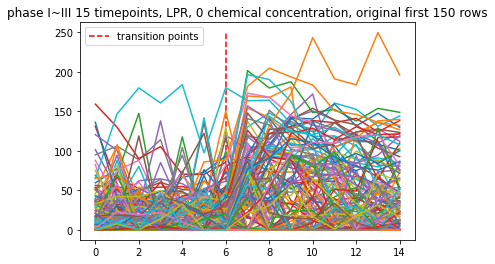

In [26]:
#''' # keep for checking
# Plot few lpr curves to check transition points
# Plotting to make sure that data makes sense
time_index_start = 5 # because 0-3th columns show irrelevant values (e.g. chemical.id, conc, plate.id, well)
num_time_points = 15 

print ("df_0_conc.shape:" + str(df_0_conc.shape))
# chemical.id 414 -> (181, 29)
# all 148 chemicals for 15 timepoints -> (4720, 20)

#print (lpr_min.iloc[:1, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

cwd = os.getcwd()
print (cwd)

fig, ax = plt.subplots()



ax.plot(np.transpose(df_0_conc.iloc[:150,time_index_start:time_index_start + num_time_points].values));
plt.title('phase I~III 15 timepoints, LPR, 0 chemical concentration, original first 150 rows')
plt.vlines(x = [6], ymin = 0,  ymax=250,
           colors = 'red', 
           label = 'transition points', linestyles='--')


'''
ax.plot(np.transpose(df_0_conc.iloc[:,time_index_start:time_index_start + num_time_points].values));
plt.title('phase I~III 15 timepoints, LPR, 0 chemical concentration, original full rows')
plt.vlines(x = [6], ymin = 0,  ymax=400,
           colors = 'red', 
           label = 'transition points', linestyles='--')
'''

plt.legend()

# complete_file_path_basename = os.path.basename(complete_file_path)
# output_filename_wo_ext = os.path.splitext(complete_file_path_basename)[0]
# output_filename = output_filename_wo_ext + "_all_conc.png"
# plt.savefig(output_filename, bbox_inches="tight")

In [58]:
df_0_conc.head()

,chemical.id,plate.id,well,chemical_plate_well,conc,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17
3,163,1,A12,163_1_A12,0.0,68.9,40.8,4.4,1.5,19.5,10.3,16.7,81.1,4.6,18.5,0.6,0.0,0.0,38.3,0.3
8,163,1,A6,163_1_A6,0.0,50.0,106.3,38.5,43.5,46.7,34.3,150.0,34.3,9.3,3.6,32.7,1.1,28.2,18.4,73.0
15,163,1,B12,163_1_B12,0.0,1.6,69.9,147.4,0.9,117.7,5.9,99.6,0.0,0.0,24.2,0.0,3.2,0.0,14.0,5.0
20,163,1,B6,163_1_B6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.9,1.9,0.0,0.0,18.5,3.9,1.3
27,163,1,C12,163_1_C12,0.0,0.0,4.2,0.0,18.4,5.4,40.1,19.4,91.8,25.0,100.8,26.9,23.6,75.2,12.2,19.3


In [27]:
df_0_conc_t = df_0_conc.iloc[:,5:20]
df_0_conc_t.head()

,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17
3,68.9,40.8,4.4,1.5,19.5,10.3,16.7,81.1,4.6,18.5,0.6,0.0,0.0,38.3,0.3
8,50.0,106.3,38.5,43.5,46.7,34.3,150.0,34.3,9.3,3.6,32.7,1.1,28.2,18.4,73.0
15,1.6,69.9,147.4,0.9,117.7,5.9,99.6,0.0,0.0,24.2,0.0,3.2,0.0,14.0,5.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.9,1.9,0.0,0.0,18.5,3.9,1.3
27,0.0,4.2,0.0,18.4,5.4,40.1,19.4,91.8,25.0,100.8,26.9,23.6,75.2,12.2,19.3


array([15.84697034, 15.75872881, 16.44235169, 16.56260593, 17.11788136,
       16.84167373, 19.44726695, 53.87538136, 53.03625   , 51.71502119,
       47.02067797, 42.77108051, 39.19652542, 36.30099576, 33.80544492])

np.mean(mean_of_light):16.859639830508474
np.mean(mean_of_dark):44.71517213983051
31.715923728813554


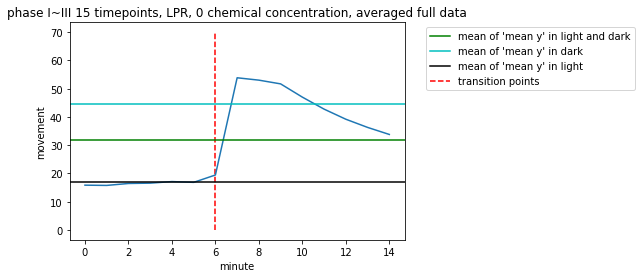

In [28]:
# (Goal): See average y values

array_mean_all_period = df_0_conc_t.mean(axis=0).to_numpy()
display(array_mean_all_period)
x = []
x_range = 15
for i in range(x_range):
    x.append(i)

plt.plot(x, array_mean_all_period)

x_labels = []
for i in range(x_range):
    x_labels.append(i)

plt.xticks(np.arange(min(x), max(x)+1, 2))

plt.xlabel("minute")
plt.ylabel("movement")
plt.title('phase I~III 15 timepoints, LPR, 0 chemical concentration, averaged full data')


mean_of_light = []
for i in ['t3', 't4', 't5', 't6', 't7', 't8', 't9']:
    mean_of_light.append(df_0_conc_t[i].mean())
print (f"np.mean(mean_of_light):{np.mean(mean_of_light)}") #16.85


mean_of_dark = []
for i in ['t10', 't11', 't12', 't13', 't14', 't15', 't16', 't17']:
    mean_of_dark.append(df_0_conc_t[i].mean())
print (f"np.mean(mean_of_dark):{np.mean(mean_of_dark)}") # 44.71


print(array_mean_all_period.mean()) # 31.715

plt.axhline(label='mean of \'mean y\' in light and dark', y=array_mean_all_period.mean(), xmin=min(x), xmax=max(x), color='g')
plt.axhline(label='mean of \'mean y\' in dark', y=np.mean(mean_of_dark), xmin=min(x), xmax=max(x), color='c')
plt.axhline(label='mean of \'mean y\' in light', y=np.mean(mean_of_light), xmin=min(x), xmax=max(x), color='k')

plt.vlines(x = [6], ymin = 0,  ymax=70,
           colors = 'red', 
           label = 'transition points', linestyles='--')
plt.legend()

l = plt.legend(bbox_to_anchor=(1.05, 1))
l.set_zorder(2.5)

#plt.ylim(0, 200)

plt.show()

### see near 0 rows

In [30]:
# (Goal) Define function to do QC near 0 plate per fish

def count_near_0_per_plate_counting_each_fish(array_lpr_min_t_only):
    
    threshold = 16.86 # mean of light period
    
    #print(f"\narray_lpr_min_t_only.shape:{array_lpr_min_t_only.shape}")
    #print(f"array_lpr_min_t_only[:1]:{array_lpr_min_t_only[:1]}")
    array_lpr_min_t_only_flattened = array_lpr_min_t_only.flatten()
    count_lt_threshold = 0
    count_gt_threshold = 0
    #print(f"array_lpr_min_t_only_flattened.shape:{array_lpr_min_t_only_flattened.shape}")
    for i in range(len(array_lpr_min_t_only_flattened)):
        if (array_lpr_min_t_only_flattened[i] < threshold):
            count_lt_threshold += 1
        else:
            count_gt_threshold += 1
    
#     print (f"count_lt_threshold:{count_lt_threshold}")
#     print (f"count_gt_threshold:{count_gt_threshold}")
    
    df_per_count = pd.DataFrame({'count': [count_lt_threshold, count_gt_threshold]},
                  index=['(>75%) y < threshold', '(>75%) y >= threshold'])

#     i = [0]
#     def absolute_value(val):
#         a  = df_per_count.iloc[i[0]%len(df_per_count),i[0]//len(df_per_count)]
#         i[0] += 1
#         return a
            
    '''
    # keep this for drawing fig
    my_explode=(0,0.1)
#    plot = df_per_count.plot.pie(title="fish counts", y='count', figsize=(5, 5),
 #                       explode=my_explode, autopct='%1.1f%%')
#     plot = df_per_count.plot.pie(title="fish counts", y='count', figsize=(5, 5),
#                         explode=my_explode, autopct=absolute_value)

    try:
        largest_file_index = 0
        files = [f for f in os.listdir('.') if os.path.isfile(f)]
        for f_name in files:
            if 'pie' in f_name:
                #print (f_name)
                splited_f_name = f_name.split('.png')
                splited_f_name2 = splited_f_name[0].split('pie-')
                if (int(splited_f_name2[1])) > largest_file_index:
                    largest_file_index = (int(splited_f_name2[1]))
                    
        output_f_name = 'pie-' + str(largest_file_index+1) + '.png'
        plot.figure.savefig(output_f_name)
                
    except:
        plot.figure.savefig('pie-001.png')
    #'''     
    
    
    array_t = []
    for i in range(14):
        if i in [7,8,9,10,11,12,13]:
            array_t.append(i)
    #print(array_t)


    # just to draw plot per row
    if count_lt_threshold > (count_lt_threshold+count_gt_threshold)*0.75:
        '''
        show_count = 0
        for i in range(len(array_lpr_min_t_only)):
            array_lpr_min_t_only_per_row = array_lpr_min_t_only[i]
#             print (array_t)
#             print (array_lpr_min_t_only_per_row)
#             print (len(array_t))
#             print (len(array_lpr_min_t_only_per_row))
            plt.plot(array_t, array_lpr_min_t_only_per_row, color='cyan', linestyle='-')

            plt.xlabel("minute")
            plt.ylabel("movement")
            plt.title("(most 'movement < threshold') Individual movement of fish per minute (negative ctrl data only)")

            plt.vlines(x = [6], ymin = 0,  ymax=150,
                   colors = 'red', 
                   label = 'transition points', linestyles='--')
            plt.legend()
            plt.xticks(np.arange(0, 14, step=2))
            plt.xlim(0, 15)
            #plt.ylim(bottom, top)
            
            plt.show()
            show_count += 1
            if show_count > 4:
                break
        '''
        return "mostly_lt_threshold"

    else: # not 'mostly < threshold'
        '''
        show_count = 0
        for i in range(len(array_lpr_min_t_only)):
            array_lpr_min_t_only_per_row = array_lpr_min_t_only[i]
            #print (f"array_lpr_min_t_only_per_row.shape:{array_lpr_min_t_only_per_row.shape}")
            plt.plot(array_t, array_lpr_min_t_only_per_row, color='cyan', linestyle='-')

            plt.xlabel("minute")
            plt.ylabel("movement")
            plt.title("(NOT most 'movement < threshold') Individual movement of fish per minute (negative control data only)")
            
            #current_ylim = plt.get_ylim()
            #print (f"current_ylim:{current_ylim}")
            
            plt.vlines(x = [6], ymin = 0,  ymax=150,
                   colors = 'red', 
                   label = 'transition points', linestyles='--')
            plt.legend()
            plt.xticks(np.arange(0, 14, step=3))
            plt.xlim(0, 15)
            plt.show()
            show_count += 1
            if show_count > 4:
                break
        '''
        return "not_mostly_lt_threshold"
# (Goal) Define function to do QC near 0 plate per fish
print ("done")

done


/Users/kimd999/Dropbox/script/python/srpAnalytics/code/latest/2_bmd/1_before_bmd/LPR/15_timepoints/QC_w_0_conc
array_chemical_with_any_plate_of_mostly_lt_threshold:[355, 357, 1273, 1532, 1704, 1807, 1845, 1944, 2960, 3127]
len(array_chemical_with_any_plate_of_mostly_lt_threshold):10


,Condition,Count
0,# of plates NOT most 'movement < threshold',283
1,# of plates most 'movement < threshold',12


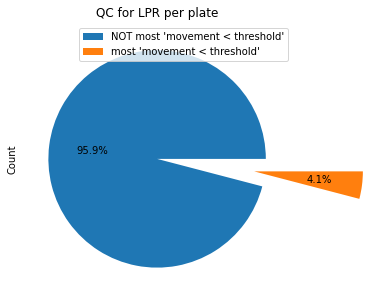

In [38]:
## (Goal) Use function to see near 0 fish per chemical and plate
## (how) Apply 'mean movement of light period of 2nd cycle' to 'dark period of 2nd cycle' only


full_devel = "full"
#full_devel = "devel"


if (full_devel == "full"):
    chemical_id_from_here = np.unique(df_0_conc['chemical.id'])
else:
    chemical_id_from_here = [163]

dic_per_chemical_plate = {}
array_chemical_with_any_plate_of_mostly_lt_threshold = []

f_out = open("LPR_15_timepoints_0_conc_chemical_plate_by_QC.csv", 'w')
f_out.write("chemical,plate,LPR_QC_verdict\n")
for chemical_id in chemical_id_from_here:
    #print("\nchemical_id:\n" + str(chemical_id))
    
    df_lpr_min_per_chemical_id = df_0_conc.loc[df_0_conc['chemical.id'] == chemical_id]
    
    plate_id_from_here = np.unique(df_lpr_min_per_chemical_id['plate.id'])
    #print (plate_id_from_here)
    chemical_has_mostly_lt_threshold_plate = False
    for plate_id in plate_id_from_here:
        #print("\nplate_id:\n" + str(plate_id))
        df_lpr_min_per_chemical_id_plate_id = df_lpr_min_per_chemical_id.loc[df_lpr_min_per_chemical_id['plate.id']\
                                                                             == plate_id]
        df_lpr_min_per_chemical_id_plate_id_t_only = pd.DataFrame(df_lpr_min_per_chemical_id_plate_id.iloc[:,5:19])
        
        df_lpr_min_per_chemical_id_plate_id_t_only_dark \
             = df_lpr_min_per_chemical_id_plate_id_t_only.drop\
             (df_lpr_min_per_chemical_id_plate_id_t_only.columns[[0,1,2,3,4,5,6]], axis=1)
        
        array_lpr_min_per_chemical_id_plate_id_t_only_dark = df_lpr_min_per_chemical_id_plate_id_t_only_dark.to_numpy()
        
        verdict = count_near_0_per_plate_counting_each_fish(array_lpr_min_per_chemical_id_plate_id_t_only_dark)
        
        #print(f"chemical_id: {chemical_id}, plate_id: {plate_id} -> {verdict}")
        
        combi = (str(chemical_id), str(plate_id))
        dic_per_chemical_plate[combi] = verdict
        
        if (verdict == 'mostly_lt_threshold'):
            chemical_has_mostly_lt_threshold_plate = True
            write_this = str(chemical_id) + "," + str(plate_id) + "," + "fail\n"
            f_out.write(write_this)
        else:
            write_this = str(chemical_id) + "," + str(plate_id) + "," + "pass\n"
            f_out.write(write_this)
            
    if (chemical_has_mostly_lt_threshold_plate == True):
        array_chemical_with_any_plate_of_mostly_lt_threshold.append(chemical_id)
### end of for chemical_id in chemical_id_from_here:  
f_out.close()

cwd = os.getcwd()
print (cwd)

print (f"array_chemical_with_any_plate_of_mostly_lt_threshold:{array_chemical_with_any_plate_of_mostly_lt_threshold}")
print (f"len(array_chemical_with_any_plate_of_mostly_lt_threshold):{len(array_chemical_with_any_plate_of_mostly_lt_threshold)}")

number_of_chemical_plate_not_mostly_lt_threshold = sum(map(('not_mostly_lt_threshold').__eq__, dic_per_chemical_plate.values()))
number_of_chemical_plate_mostly_lt_threshold     = sum(map(('mostly_lt_threshold').__eq__, dic_per_chemical_plate.values()))

data = [['# of plates NOT most \'movement < threshold\'', number_of_chemical_plate_not_mostly_lt_threshold], 
        ['# of plates most \'movement < threshold\'', number_of_chemical_plate_mostly_lt_threshold]]

df_result = pd.DataFrame(data, columns = ['Condition', 'Count'], index=None)


i = [0]
def absolute_value(df):
    a  = df.iloc[i[0]%len(df),i[0]//len(df)]
    i[0] += 1
    return a
    
#df_per_count = pd.DataFrame({'count': [mostly_lt_threshold, not_mostly_lt_threshold]},
#              index=['(>75%) y < 5', '(>75%) y >= 5'])
    
#df_result = df_result.drop['index']

display(df_result)

my_explode=(0,0.9)
plot = df_result.plot.pie(title="QC for LPR per plate", y='Count', figsize=(5, 5),
                   explode=my_explode, autopct='%1.1f%%', labels=['', ''])

#plot = df_result.plot.pie(title="QC for LPR per plate", y='Count', figsize=(5, 5),
#                        explode=my_explode, autopct=absolute_value(df_result))

labels = ['NOT most \'movement < threshold\'', 'most \'movement < threshold\'']
plt.legend(labels, loc="best")
plt.show()
## (Goal) Use function to see near 0 fish per chemical and plate
## (how) Apply 'mean movement of light period of 2nd cycle' to 'dark period of 2nd cycle' only


len(np.unique(df_0_conc['chemical.id'])):148
len(array_chemical_with_any_plate_of_mostly_lt_threshold):        10


,Condition,Count
0,# of chemicals without any QC failed plate,138
1,# of chemicals with 1 or more QC failed plate,10


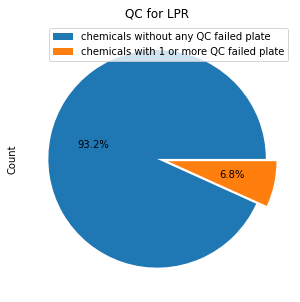

In [39]:
# (Goal) Show % of affected chemicals

print (f"len(np.unique(df_0_conc['chemical.id'])):{len(np.unique(df_0_conc['chemical.id']))}")
print (f"len(array_chemical_with_any_plate_of_mostly_lt_threshold):\
        {len(array_chemical_with_any_plate_of_mostly_lt_threshold)}")

data = [['# of chemicals without any QC failed plate', \
         (len(np.unique(df_0_conc['chemical.id']))-len(array_chemical_with_any_plate_of_mostly_lt_threshold))], 
        ['# of chemicals with 1 or more QC failed plate', \
         len(array_chemical_with_any_plate_of_mostly_lt_threshold)]]

df_result = pd.DataFrame(data, columns = ['Condition', 'Count'], index=None)


i = [0]
def absolute_value(df):
    a  = df.iloc[i[0]%len(df),i[0]//len(df)]
    i[0] += 1
    return a
    
#df_per_count = pd.DataFrame({'count': [mostly_lt_threshold, not_mostly_lt_threshold]},
#              index=['(>75%) y < 5', '(>75%) y >= 5'])
    
#df_result = df_result.drop['index']

display(df_result)

#my_explode=(0,0.9)
my_explode=(0,0.1)
plot = df_result.plot.pie(title="QC for LPR", y='Count', figsize=(5, 5),
                   explode=my_explode, autopct='%1.1f%%', labels=['', ''])

#plot = df_result.plot.pie(title="QC for LPR per plate", y='Count', figsize=(5, 5),
#                        explode=my_explode, autopct=absolute_value(df_result))

labels = ['chemicals without any QC failed plate', 'chemicals with 1 or more QC failed plate']
plt.legend(labels, loc="best")
plt.show()
# (Goal) Show % of affected chemicals

In [ ]:
a=b

,Condition,Count
0,number_of_chemicals NOT 'mostly < threshold',379
1,number_of_chemicals 'mostly < threshold',4


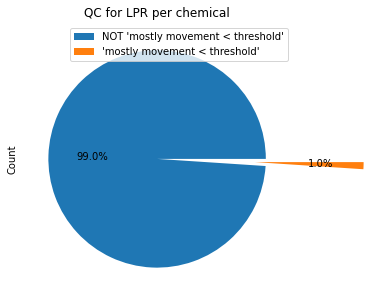

In [13]:
## (Goal) Use function to see near 0 fish per chemical

full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(df_0_conc['chemical.id'])
else:
    #chemical_id_from_here = [53, 1595]
    chemical_id_from_here = [53]

dic_per_chemical = {}

for chemical_id in chemical_id_from_here:
    #print("\nchemical_id:\n" + str(chemical_id))
    
    df_lpr_min_per_chemical_id = df_0_conc.loc[df_0_conc['chemical.id'] == chemical_id]

    df_lpr_min_per_chemical_id_t_only = pd.DataFrame(df_lpr_min_per_chemical_id.iloc[:,4:28])

    df_lpr_min_per_chemical_id_t_only_dark \
        = df_lpr_min_per_chemical_id_t_only.drop\
        (df_lpr_min_per_chemical_id_t_only.columns[[0,1,2, 6,7,8, 12,13,14, 18,19,20]], axis=1)

    array_lpr_min_per_chemical_id_t_only_dark = df_lpr_min_per_chemical_id_t_only_dark.to_numpy()

    #verdict = count_near_0_per_plate_counting_by_row(array_lpr_min_per_chemical_id_t_only)
    verdict = count_near_0_per_plate_counting_each_fish(array_lpr_min_per_chemical_id_t_only_dark)

    #print(f"chemical_id: {chemical_id} -> {verdict}")

    dic_per_chemical[chemical_id] = verdict

number_of_chemical_not_mostly_lt_threshold = sum(map(('not_mostly_lt_threshold').__eq__, dic_per_chemical.values()))
number_of_chemical_mostly_lt_threshold     = sum(map(('mostly_lt_threshold').__eq__, dic_per_chemical.values()))


data = [['number_of_chemicals NOT \'mostly < threshold\'', number_of_chemical_not_mostly_lt_threshold], 
        ['number_of_chemicals \'mostly < threshold\'', number_of_chemical_mostly_lt_threshold]]

df_result = pd.DataFrame(data, columns = ['Condition', 'Count'], index=None)


i = [0]
def absolute_value(df):
    a  = df.iloc[i[0]%len(df),i[0]//len(df)]
    i[0] += 1
    return a
    
#df_per_count = pd.DataFrame({'count': [mostly_lt_threshold, not_mostly_lt_threshold]},
#              index=['(>75%) y < 5', '(>75%) y >= 5'])
    
#df_result = df_result.drop['index']

display(df_result)

my_explode=(0,0.9)
plot = df_result.plot.pie(title="QC for LPR per chemical", y='Count', figsize=(5, 5),
                   explode=my_explode, autopct='%1.1f%%', labels=['', ''])

#plot = df_result.plot.pie(title="QC for LPR per plate", y='Count', figsize=(5, 5),
#                        explode=my_explode, autopct=absolute_value(df_result))

labels = ['NOT \'mostly movement < threshold\'', '\'mostly movement < threshold\'']
plt.legend(labels, loc="best")
plt.show()